In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('social media.csv')
df.head()

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car
0,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,True,False,False
1,46,female,2,Facebook,Travel,United Kingdom,Urban,Student,10564,True,True,True
2,32,male,8,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,13258,False,False,False
3,60,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,12500,False,True,False
4,25,male,1,Instagram,Lifestlye,Australia,Urban,Software Engineer,14566,False,True,True


In [3]:
df.isna().sum()

age             0
gender          0
time_spent      0
platform        0
interests       0
location        0
demographics    0
profession      0
income          0
indebt          0
isHomeOwner     0
Owns_Car        0
dtype: int64

In [4]:
df.gender.value_counts()

male          337
non-binary    332
female        331
Name: gender, dtype: int64

In [5]:
df.platform.value_counts()

Instagram    363
YouTube      330
Facebook     307
Name: platform, dtype: int64

In [6]:
df.age.describe()

count    1000.000000
mean       40.986000
std        13.497852
min        18.000000
25%        29.000000
50%        42.000000
75%        52.000000
max        64.000000
Name: age, dtype: float64

In [7]:
df.age.unique()

array([56, 46, 32, 60, 25, 38, 36, 40, 28, 41, 53, 57, 20, 39, 19, 61, 47,
       55, 50, 29, 42, 44, 59, 45, 33, 64, 54, 24, 26, 35, 21, 31, 43, 37,
       52, 34, 23, 51, 27, 48, 62, 58, 18, 22, 30, 49, 63], dtype=int64)

In [8]:
def age_group(age):
    if age <= 27:
        return 'Young'
    elif age <= 40 & age > 27:
        return 'Adults'
    else:
        return 'Senior Citizens'

In [9]:
df['age category'] = df['age'].apply(age_group)

In [10]:
df.head()

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car,age category
0,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,True,False,False,Senior Citizens
1,46,female,2,Facebook,Travel,United Kingdom,Urban,Student,10564,True,True,True,Senior Citizens
2,32,male,8,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,13258,False,False,False,Adults
3,60,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,12500,False,True,False,Senior Citizens
4,25,male,1,Instagram,Lifestlye,Australia,Urban,Software Engineer,14566,False,True,True,Young


In [11]:
df.time_spent.describe()

count    1000.000000
mean        5.029000
std         2.537834
min         1.000000
25%         3.000000
50%         5.000000
75%         7.000000
max         9.000000
Name: time_spent, dtype: float64

In [12]:
df.profession.value_counts()

Marketer Manager     355
Software Engineer    336
Student              309
Name: profession, dtype: int64

In [13]:
avg_time=df.groupby(by=['platform']).agg({'time_spent':'mean'}).reset_index()
avg_time

,platform,time_spent
0,Facebook,5.055375
1,Instagram,5.151515
2,YouTube,4.869697


In [14]:
avg_time.head()

,platform,time_spent
0,Facebook,5.055375
1,Instagram,5.151515
2,YouTube,4.869697


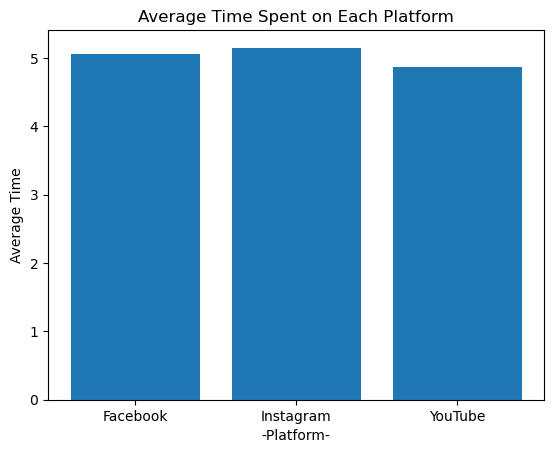

In [15]:
x = avg_time.platform
y = avg_time.time_spent
plt.bar(x,y)

plt.xlabel('-Platform-')
plt.ylabel('Average Time')
plt.title('Average Time Spent on Each Platform')
plt.show()

In [16]:
avg_time_gender = df.groupby(by=['gender', 'platform']).agg({'time_spent' : 'mean'}).reset_index()
avg_time_gender

,gender,platform,time_spent
0,female,Facebook,5.423529
1,female,Instagram,5.311111
2,female,YouTube,4.864865
3,male,Facebook,4.991150
4,male,Instagram,4.867188
5,male,YouTube,4.562500
6,non-binary,Facebook,4.834862
7,non-binary,Instagram,5.300000
8,non-binary,YouTube,5.113821


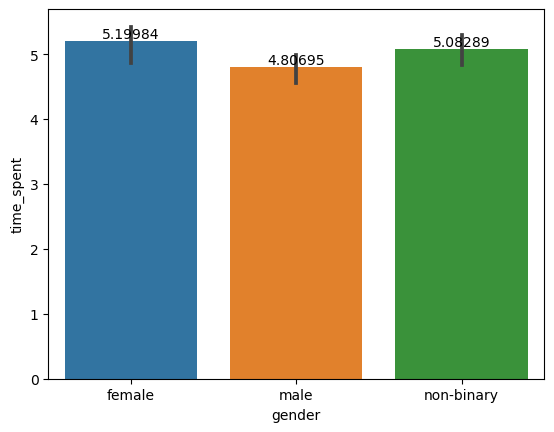

<Figure size 5000x1000 with 0 Axes>

In [17]:
ax = sns.barplot(x = avg_time_gender.gender, y = avg_time_gender.time_spent, data = avg_time_gender)
ax.bar_label(ax.containers[0])
plt.figure(figsize=(50,10))
plt.show()

In [18]:
avg_time_by_profession = df.groupby(by=['profession','platform']).agg({'time_spent': 'mean'}).reset_index()
avg_time_by_profession

,profession,platform,time_spent
0,Marketer Manager,Facebook,5.281818
1,Marketer Manager,Instagram,5.031250
2,Marketer Manager,YouTube,4.991453
3,Software Engineer,Facebook,4.797872
4,Software Engineer,Instagram,5.265625
5,Software Engineer,YouTube,4.719298
6,Student,Facebook,5.048544
7,Student,Instagram,5.158879
8,Student,YouTube,4.898990


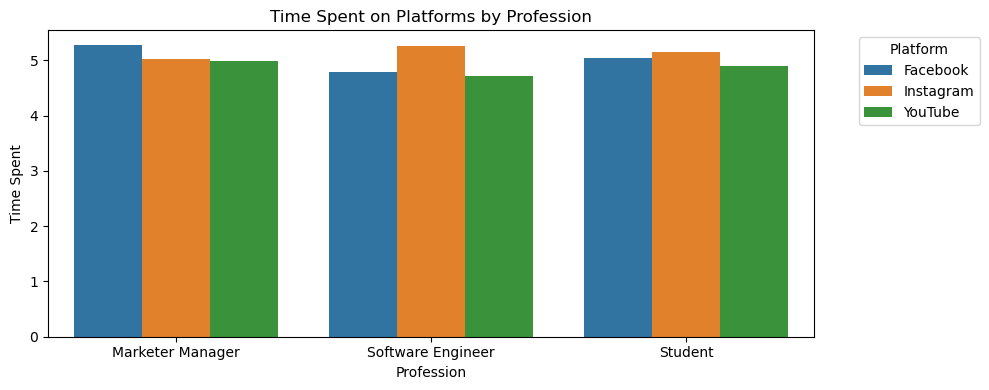

In [19]:
plt.figure(figsize=(10,4)) 
sns.barplot(data=avg_time_by_profession, x='profession', y='time_spent', hue='platform')


plt.title('Time Spent on Platforms by Profession')
plt.xlabel('Profession')
plt.ylabel('Time Spent')
plt.xticks(rotation=360)
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [23]:
age_group_avg = df.groupby(by=['age category']).agg({'time_spent':'mean'}).reset_index()
age_group_avg

,age category,time_spent
0,Adults,4.714286
1,Senior Citizens,5.032215
2,Young,5.079812


[]

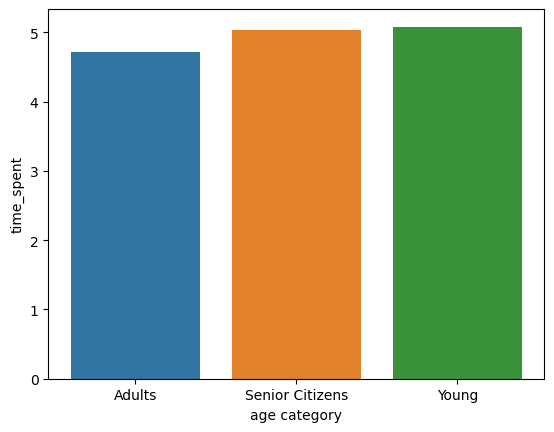

In [27]:
sns.barplot(x=age_group_avg['age category'], y= age_group_avg['time_spent'], data = age_group_avg)
plt.plot()

In [31]:
df.columns

Index(['age', 'gender', 'time_spent', 'platform', 'interests', 'location',
       'demographics', 'profession', 'income', 'indebt', 'isHomeOwner',
       'Owns_Car', 'age category'],
      dtype='object')

In [35]:
gender = df.groupby(by=['gender']).agg({'time_spent': 'mean'}).reset_index()
gender

,gender,time_spent
0,female,5.190332
1,male,4.821958
2,non-binary,5.078313


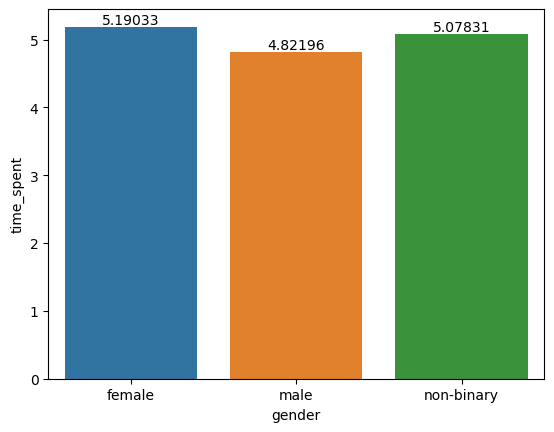

<Figure size 300x100 with 0 Axes>

In [39]:
ax = sns.barplot(x = gender.gender, y = gender.time_spent, data = gender)
ax.bar_label(ax.containers[0])
plt.figure(figsize=(3,1))
plt.show()

In [40]:
df.columns

Index(['age', 'gender', 'time_spent', 'platform', 'interests', 'location',
       'demographics', 'profession', 'income', 'indebt', 'isHomeOwner',
       'Owns_Car', 'age category'],
      dtype='object')

In [42]:
addictive_platform = df.groupby(by=['platform']).agg({'time_spent': 'mean'}).reset_index()
addictive_platform

,platform,time_spent
0,Facebook,5.055375
1,Instagram,5.151515
2,YouTube,4.869697


[]

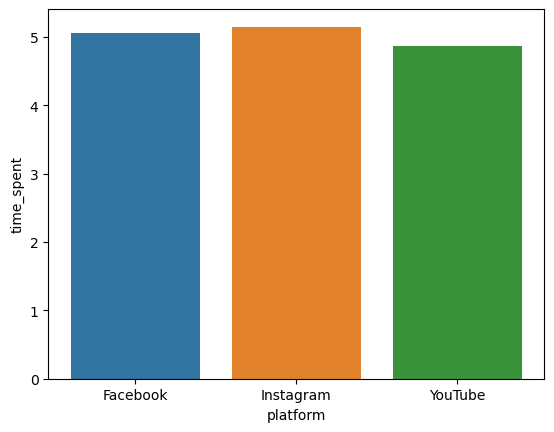

In [50]:
sns.barplot(x = addictive_platform.platform, y = addictive_platform.time_spent, data = df)
plt.plot()